### 1. Applying functions to columns

In [57]:
from datascience import *
import matplotlib

matplotlib.use('Agg')
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import numpy as np

In [58]:
ages = Table().with_columns(
    'Person', make_array('A', 'B', 'C', 'D', 'E', 'F'),
    'Age', make_array(17, 117, 52, 100, 6, 101)
)
ages

Person,Age
A,17
B,117
C,52
D,100
E,6
F,101


In [59]:
def cut_off_at_100(x):
    return min(x, 100)

In [60]:
ages.apply(cut_off_at_100, 'Age')

array([ 17, 100,  52, 100,   6, 100], dtype=int64)

In [61]:
ages.with_column('cut off age' , ages.apply(cut_off_at_100, 'Age'))

Person,Age,cut off age
A,17,17
B,117,100
C,52,52
D,100,100
E,6,6
F,101,100


In [62]:
cut_off_at_100

<function __main__.cut_off_at_100(x)>

In [63]:
cut_off = cut_off_at_100

In [64]:
cut_off

<function __main__.cut_off_at_100(x)>

In [65]:
family_heights = Table().read_table("https://raw.githubusercontent.com/yu-to-chen/data-science/master/assets/data/family_heights.csv")
family_heights

family,father,mother,midparentHeight,children,childNum,sex,childHeight
1,78.5,67,75.43,4,1,male,73.2
1,78.5,67,75.43,4,2,female,69.2
1,78.5,67,75.43,4,3,female,69
1,78.5,67,75.43,4,4,female,69
2,75.5,66.5,73.66,4,1,male,73.5
2,75.5,66.5,73.66,4,2,male,72.5
2,75.5,66.5,73.66,4,3,female,65.5
2,75.5,66.5,73.66,4,4,female,65.5
3,75,64,72.06,2,1,male,71
3,75,64,72.06,2,2,female,68


In [66]:
heights = Table().with_columns("Parents Average", (family_heights.column('father') + family_heights.column('mother'))/2, "Child Height", family_heights.column('childHeight'))
heights

Parents Average,Child Height
72.75,73.2
72.75,69.2
72.75,69
72.75,69
71,73.5
71,72.5
71,65.5
71,65.5
69.5,71
69.5,68


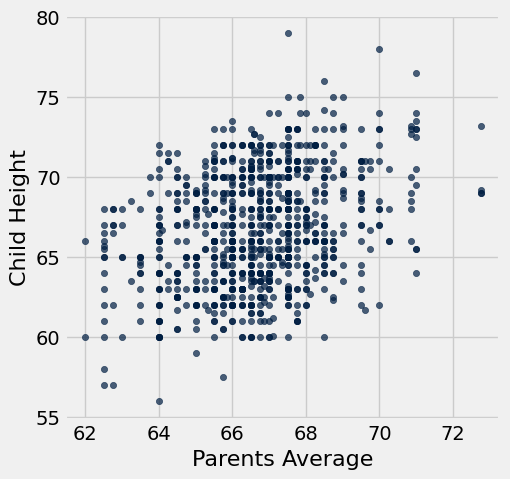

In [67]:
heights.scatter('Parents Average')

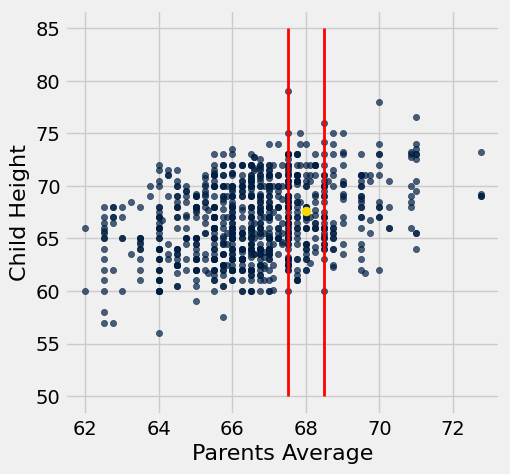

In [68]:
heights.scatter('Parents Average')
plots.plot([67.5, 67.5], [50, 85], color='red', lw=2)
plots.plot([68.5, 68.5], [50, 85], color='red', lw=2)
plots.scatter(68, 67.62, color='gold', s=40);

In [69]:
close_to_68 = heights.where('Parents Average', are.between(67.5, 68.5))
close_to_68

Parents Average,Child Height
68,74
68,70
68,68
68,67
68,67
68,66
68,63.5
68,63
67.5,65
68.1,62.7


In [70]:
np.average(close_to_68.column('Child Height'))

67.620000000000005

In [71]:
def predict_child_height(p_avg):
    close_point = heights.where('Parents Average', are.between(p_avg-0.5, p_avg+0.5))
    return np.average(close_point.column('Child Height'))

In [72]:
predict_child_height(68)

67.620000000000005

In [73]:
predict_child_height(66)

66.086407766990291

In [74]:
heigts_with_prediction = heights.with_column('Prediction', heights.apply(predict_child_height, 'Parents Average'))
heigts_with_prediction

Parents Average,Child Height,Prediction
72.75,73.2,70.1
72.75,69.2,70.1
72.75,69,70.1
72.75,69,70.1
71,73.5,70.4158
71,72.5,70.4158
71,65.5,70.4158
71,65.5,70.4158
69.5,71,68.5025
69.5,68,68.5025


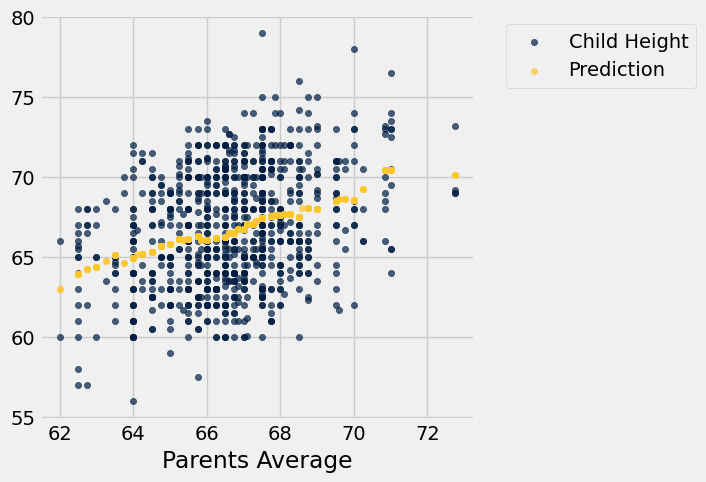

In [75]:
heigts_with_prediction.scatter('Parents Average')

In [76]:
predict_child_height(70)

68.561904761904756

### 2. Classifying by One Variable

In [77]:
from datascience import *
import matplotlib

matplotlib.use('Agg')
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import numpy as np

In [78]:
cones = Table().with_columns(
    'Flavor', make_array('strawberry', 'chocolate', 'chocolate', 'strawberry', 'chocolate'),
    'Price', make_array(3.55, 4.75, 6.55, 5.25, 5.25)
)
cones

Flavor,Price
strawberry,3.55
chocolate,4.75
chocolate,6.55
strawberry,5.25
chocolate,5.25


In [79]:
cones.group('Flavor')

Flavor,count
chocolate,3
strawberry,2


In [80]:
cones.group('Flavor', sum)

Flavor,Price sum
chocolate,16.55
strawberry,8.8


In [82]:
cones.where('Flavor', 'chocolate').column('Price')

array([ 4.75,  6.55,  5.25])

In [83]:
sum(cones.where('Flavor', 'chocolate').column('Price'))

16.550000000000001

In [84]:
# For each distinct value in `Flavor, access all the rows
# and create an array of `Price`

cones_choc = cones.where('Flavor', are.equal_to('chocolate')).column('Price')
cones_strawb = cones.where('Flavor', are.equal_to('strawberry')).column('Price')

# Display the arrays in a table

grouped_cones = Table().with_columns(
    'Flavor', make_array('chocolate', 'strawberry'),
    'Array of All the Prices', make_array(cones_choc, cones_strawb)
)

# Append a column with the sum of the `Price` values in each array

price_totals = grouped_cones.with_column(
    'Sum of the Array', make_array(sum(cones_choc), sum(cones_strawb))
)
price_totals

Flavor,Array of All the Prices,Sum of the Array
chocolate,[ 4.75 6.55 5.25],16.55
strawberry,[ 3.55 5.25],8.8


In [86]:
cones.group('Flavor', max)

Flavor,Price max
chocolate,6.55
strawberry,5.25


In [87]:
prices_max = grouped_cones.with_column("Price Max", make_array(max(cones_choc), max(cones_strawb)))
prices_max

Flavor,Array of All the Prices,Price Max
chocolate,[ 4.75 6.55 5.25],6.55
strawberry,[ 3.55 5.25],5.25


In [89]:
lengths = grouped_cones.with_column("Length of the array", make_array(len(cones_choc), len(cones_strawb)))
lengths

Flavor,Array of All the Prices,Length of the array
chocolate,[ 4.75 6.55 5.25],3
strawberry,[ 3.55 5.25],2


In [90]:
nba1 = Table.read_table('https://raw.githubusercontent.com/yu-to-chen/data-science/master/assets/data/nba_salaries.csv')
nba = nba1.relabeled(3, 'SALARY')
nba

PLAYER,POSITION,TEAM,SALARY
Paul Millsap,PF,Atlanta Hawks,18.6717
Al Horford,C,Atlanta Hawks,12
Tiago Splitter,C,Atlanta Hawks,9.75625
Jeff Teague,PG,Atlanta Hawks,8
Kyle Korver,SG,Atlanta Hawks,5.74648
Thabo Sefolosha,SF,Atlanta Hawks,4
Mike Scott,PF,Atlanta Hawks,3.33333
Kent Bazemore,SF,Atlanta Hawks,2
Dennis Schroder,PG,Atlanta Hawks,1.7634
Tim Hardaway Jr.,SG,Atlanta Hawks,1.30452


In [91]:
teams_and_money = nba.select('TEAM', 'SALARY')
teams_and_money.group('TEAM', sum)

TEAM,SALARY sum
Atlanta Hawks,69.5731
Boston Celtics,50.2855
Brooklyn Nets,57.307
Charlotte Hornets,84.1024
Chicago Bulls,78.8209
Cleveland Cavaliers,102.312
Dallas Mavericks,65.7626
Denver Nuggets,62.4294
Detroit Pistons,42.2118
Golden State Warriors,94.0851


In [93]:
nba.group("POSITION")

POSITION,count
C,69
PF,85
PG,85
SF,82
SG,96


In [96]:
position_and_money = nba.select("POSITION", "SALARY")
position_and_money.group("POSITION", np.mean)

POSITION,SALARY mean
C,6.08291
PF,4.95134
PG,5.16549
SF,5.53267
SG,3.9882


In [97]:
nba.group("POSITION", np.mean)

POSITION,PLAYER mean,TEAM mean,SALARY mean
C,,,6.08291
PF,,,4.95134
PG,,,5.16549
SF,,,5.53267
SG,,,3.9882


### 3. Cross-Classifying by More than One Variable

In [98]:
from datascience import *
import matplotlib

matplotlib.use('Agg')
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import numpy as np

In [100]:
more_cones = Table().with_columns(
    'Flavor', make_array('strawberry', 'chocolate', 'chocolate', 'strawberry', 'chocolate', 'bubblegum'),
    'Color', make_array('pink', 'light brown', 'dark brown', 'pink', 'dark brown', 'pink'),
    'Price', make_array(3.55, 4.75, 5.25, 5.25, 5.25, 4.75)
)
more_cones

Flavor,Color,Price
strawberry,pink,3.55
chocolate,light brown,4.75
chocolate,dark brown,5.25
strawberry,pink,5.25
chocolate,dark brown,5.25
bubblegum,pink,4.75


In [101]:
more_cones.group('Flavor')

Flavor,count
bubblegum,1
chocolate,3
strawberry,2
